In [15]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [16]:
import pandas as pd
from neuralprophet import NeuralProphet

In [17]:
from prophet import Prophet
import pandas as pd

In [18]:
from prophet import Prophet
import pandas as pd
s=pd.read_csv(r"C:\Users\prernagupta\Desktop\corr\mediumpink.csv")


In [19]:
s

,ds,y,nsi,newness_index,markdown_index,oos_index,avg_price_trend_innovator,avg_price_trend_mass,avg_price_trend_conservative,avg_price_base_innovator,...,innovator_adoption,mass_adoption,conservative_adoption,innovator_smoothed_data,mass_smoothed_data,conservative_smoothed_data,trend,trend_index,trend_name,model_created_at
0,19/03/2017,0.031533,0.028065,-0.086294,1.043520,0.021954,385.0,31.500000,20.000,248.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
1,26/03/2017,0.028741,0.029921,-0.046767,1.040641,0.024266,373.5,30.352143,14.990,225.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
2,02/04/2017,0.030782,0.031318,-0.006635,1.037846,0.026182,395.0,30.995000,14.990,228.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
3,09/04/2017,0.032957,0.032344,0.034102,1.035134,0.027716,350.0,30.911667,21.592,239.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
4,16/04/2017,0.033180,0.033090,0.075446,1.032506,0.028883,364.0,30.000000,22.990,239.500000,...,1.421801,1.894918,1.22449,1.26386,1.546303,1.478085,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,02/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
316,09/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
317,16/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22
318,23/04/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Pink Medium Apparel Global,722,pink_medium_apparel_all_w,May-22


In [20]:
s=s.iloc[:, [0,1]]
s
s['ds']= pd.to_datetime(s['ds'])
s
s=s.dropna()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-20-3b3973789abb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['ds']= pd.to_datetime(s['ds'])



In [21]:
s.tail(50)

,ds,y
218,2021-05-23,0.037869
219,2021-05-30,0.039114
220,2021-06-06,0.039019
221,2021-06-13,0.038188
222,2021-06-20,0.038228
223,2021-06-27,0.037880
224,2021-04-07,0.036972
225,2021-11-07,0.037232
226,2021-07-18,0.036328
227,2021-07-25,0.036586


In [22]:
m = NeuralProphet(growth="discontinuous",  # Determine trend types: 'linear', 'discontinuous', 'off'
        changepoints=None, # list of dates that may include change points (None -> automatic )
        n_changepoints=5,
        changepoints_range=1,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        num_hidden_layers=1,
        d_hidden=None,     # Dimension of hidden layers of AR-Net
        ar_sparsity=None,  # Sparcity in the AR coefficients
        learning_rate=10,
        loss_func="Huber",
        normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
        impute_missing=True, epochs=2000)
metrics = m.fit(s, freq="7D")
future = m.make_future_dataframe(s, periods=75, n_historic_predictions=len(s))
forecast = m.predict(future)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
Epoch[2000/2000]: 100%|█| 2000/2000 [01:19<00:00, 25.16it/s, SmoothL1Loss=0.0128, MAE=0.00326, RMSE=0.00443, RegLoss=0]


Text(0.5, 1.0, 'mediumpink')

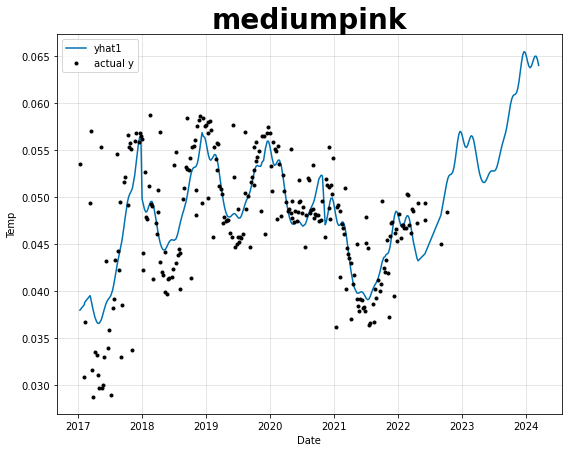

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
m.plot(forecast, xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("mediumpink", fontsize=28, fontweight="bold")

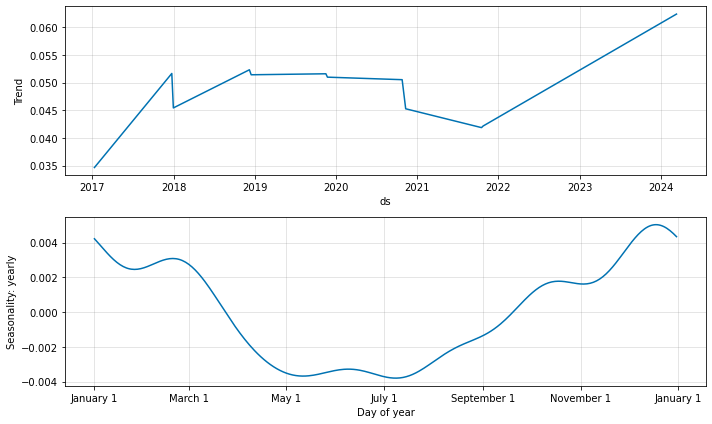

In [24]:
fig_comp = m.plot_components(forecast)

In [25]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.696632,0.030824,0.038690,0.0
1,0.215680,0.015378,0.018569,0.0
2,0.170916,0.013684,0.016390,0.0
3,0.088361,0.009803,0.011747,0.0
4,0.042062,0.006604,0.008127,0.0
...,...,...,...,...
1995,0.012850,0.003262,0.004377,0.0
1996,0.012843,0.003262,0.004324,0.0
1997,0.012838,0.003261,0.004394,0.0
1998,0.012838,0.003261,0.004442,0.0
